### Introduction

- In this notebook we are going to deal with a unsupervised learning (learning without teacher) problem called clustering.
- **Clustering** is a classical problem of Machine Learning which do not require any labels for any predictions. It is used to find patterns in data.

The collected data contains stocks of various companies collected for a period of time.

### Steps Involved:

1. Importing dataset
2. Exploratory Data Analysis (EDA) and Preprocessing
3. Feature Engineering
4. Model Building
5. Model Training
6. Model Testing
7. Inference
8. Optimization

1. **Importing dataset-** In this notebook we are going to use [pandas](https://pandas.pydata.org/) for loading our dataset. As our dataset is small, pandas works best in our case. For data sized upto Gigs we can use [datatable](https://github.com/h2oai/datatable).

2. **EDA and Preprocessing-** EDA, a crucial step that lets you get friendly with the data. It involves inspection of data through methods of dataframe object, visualization, statistics and hypothesis generation. EDA tells which preprocessing technique to use.
    
    Preprocessing can be defined as a method which makes our data suitable to fit on a machine learning model. Strategies that can be used in preprocessing of data is removing the NaN (missing) values, filling the NaN or impute those values using mean, median or mode, data type of the columns,dropping the unnecessary columns etc.
        
3. **Feature Engineering-** Feature Engineering involves feature selection or feature generation.
    - **Feature selection-** It involves selection of relevant features from the available set of features. The selection can be the entire set of features or a subset of it.
    
    - **Feature generation-** Construction or extraction of new features from the existing features. Useful when we have low set of features. The construction of feature is all mathematical and based on the domain expertise.

4. **Model Building-** In this step the suitable machine learning model is used. The data is divided into train and test set.

5. **Model Training-** Fitting the features into a machine learning model. The value of hyperparameters can use the default value or can be tuned in **Optimization** phase.

6. **Model Testing-** After the model has learned the pattern of data points(features) it is the time to evaluate our model performance. The model is going to be evaluated on a different performance metrics.

7. **Inference-** We have evaluated our model, its time to generate inference from the saved model.

8. **Optimization-** In this step we tune the hyperparameters or the learned model. The hyperparameters can be tuned by using GridSearch. The learned model can be tuned by using cross-validation technique.


### Frameworks used:
- pandas
- matplotlib
- scikit-learn

### 1. Importing dataset

#### Looking for the dataset directory

In [1]:
from glob import glob
files = glob('*')

files

['Clustering.ipynb', 'data']

The dataset is residing in **data** directory.

#### Getting file name

In [2]:
dataset = glob('data/*')

dataset

['data/Telco-Customer-Churn.csv', 'data/stocks.csv']

#### Loading data into DataFrame using pandas.

In [3]:
import pandas as pd

telco_user_churn = pd.read_csv('data/Telco-Customer-Churn.csv')

#### Inspecting first 5 rows of dataset

In [4]:
telco_user_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Number of rows and columns in our dataset

In [5]:
telco_user_churn.shape

(7043, 21)

**Rows= 7043, Columns= 21**

### 2. Exploratory Data Analysis (EDA) and Preprocessing

**Inspecting the columns datatype and how many of them have null values.**

In [6]:
telco_user_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

#### Observations:

- None of the columns have null values.
- But columns like gender, SeniorCitizen, Partner etc. should be categorical.

#### Number of unique values in each column

In [7]:
for col in telco_user_churn.columns:
    print(col, telco_user_churn[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [8]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

#### Distribution of Male and Female with their churn rate

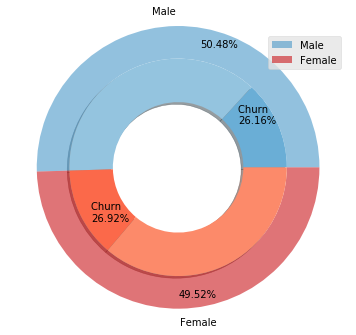

In [9]:
plt.rcParams['figure.figsize'] = [6, 5]

gender_count = telco_user_churn.gender.value_counts()
churn_rate = [930, 2625, 939, 2549]

# Colors
male, female = [plt.cm.Blues, plt.cm.Reds]

fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(gender_count.values, radius=1.3, labels=gender_count.index,
                  colors=[male(0.6), female(0.75)])
plt.setp(mypie, width=0.3, alpha=0.6)

mypie2, _ = ax.pie(churn_rate, radius=1.3-0.3,  labeldistance=0.7,
                   colors=[male(0.5), male(0.4), female(0.5), female(0.4)], shadow=True)
plt.setp(mypie2, width=0.4)

# Male distribution
plt.annotate('{:.2f}%'.format(gender_count.values[0] / gender_count.values.sum() * 100), 
             xy=(.2, 1.1))

# Male churn rate
plt.annotate('Churn \n{:.2f}%'.format(churn_rate[0] / gender_count.values[0] * 100), 
             xy=(.55, 0.4))

# Female distribution
plt.annotate('{:.2f}%'.format(gender_count.values[1] / gender_count.values.sum() * 100), 
             xy=(0, -1.2))

# Female churn rate
plt.annotate('Churn \n{:.2f}%'.format(churn_rate[2] / gender_count.values[1] * 100), 
             xy=(-0.8, -0.5))

plt.legend(loc='upper right')
plt.show()

**Observation:** Though males are high in number but females have more churn rate.

### How many users have phone service?

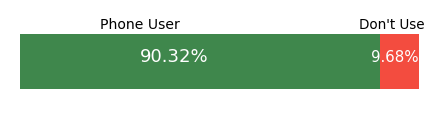

In [10]:
plt.rcParams['figure.figsize'] = [7.5, 2]

user_phone_service = telco_user_churn.PhoneService.value_counts(normalize=True)

test = pd.DataFrame({'x': [user_phone_service.values[0]], 'y': [user_phone_service.values[1]]})

test.plot(kind='barh', stacked=True, legend=False, 
          color=['#005f11', '#ef1100'], alpha=0.75)
plt.axis('off')
plt.annotate('Phone User', xy=(0.2, 0.3), fontsize=14)
plt.annotate("Don't Use", xy=(0.85, 0.3), fontsize=13.5)
plt.annotate("{:.2f}%".format(test['x'][0]*100), xy=(0.3, 0),
             color='#ffffff', fontsize=18)
plt.annotate("{:.2f}%".format(test['y'][0]*100), xy=(0.88, 0),
             color='#ffffff', fontsize=15)
plt.show()

### Internet service distribution of phone users

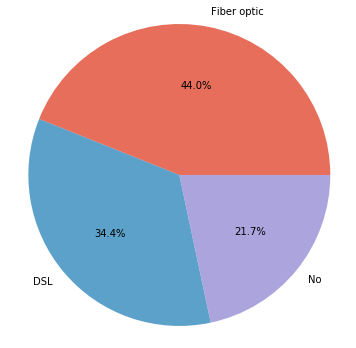

In [11]:
plt.rcParams['figure.figsize'] = [6, 6]

internet_service = telco_user_churn.InternetService.value_counts(normalize=True)

plt.pie(internet_service.values, labels=internet_service.index, 
        autopct='%1.1f%%', wedgeprops={'alpha':0.8})
plt.axis('equal')
plt.show()